# Aviation Industry Expansion

<center><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*4_HaFNNr4Zw-7xuH7kK-8Q.png"></center>

# Business Understanding

Our company is *expanding* by **purchasing and operating airplanes** for commercial and private enterprises. In this analysis, I determine which aircraft are the **lowest risk** for the company to start this new business endeavor. I use the fatal injuries rate, uninjured rate, and total number of injuries as meaures of safety and investigate the effect the make of the aircraft, the number of engines, and the location have on these safety parameters.

I investigate the following three business questions:
1. What **number of engines** is least likely to result in a fatal injury?
2. What is the safest aircraft **make**?
3. What is the safest **location** to operate out of?

# Data Understanding

<center><img src="https://www.datasciencecentral.com/wp-content/uploads/2023/10/AdobeStock_623805808.jpeg" style="height:400px" /></center>

The [Aviation Accident Database & Synopses, up to 2023](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data) from the NTSB (National Transportation Safety Board) aviation accident database contains information about ​**civil aviation accidents and selected incidents** that occurred between 1962 and 2023 within the United States, its territories and possessions, and in international waters. From this database, I analyze the numbers of injuries, the make of the aircrafts, the number of engines on the aircrafts, and the location of the incidents to determine our first step in the expansion of the aviation industry.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
aviation_df = pd.read_csv('data/AviationData.csv', encoding='latin', low_memory=False)

## Data Preparation

The dataset has approximately 89,000 accidents and incidents. All but 4 columns have varying numbers of null values. There are approximately 28,000 unique locations and 8,000 unique makes. These will have to be greatly narrowed down to determine 3 recommended locations and 3 recommended aircrafts.

In [3]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Count of how many null values are in each column
aviation_df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [6]:
# Provide descriptive statistics for the numerical data columns
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
# Number of options for cities
aviation_df['Location'].nunique()

27758

In [8]:
aviation_df['Make'].nunique()

8237

In [9]:
# Print a count of the top 5 values in each column
for col in aviation_df.columns:
    print(col, '\n', aviation_df[col].value_counts(normalize=True).head(), '\n\n')

Event.Id 
 Event.Id
20001212X19172    0.000034
20001214X45071    0.000034
20220730105623    0.000022
20051213X01965    0.000022
20001212X16765    0.000022
Name: proportion, dtype: float64 


Investigation.Type 
 Investigation.Type
Accident    0.956418
Incident    0.043582
Name: proportion, dtype: float64 


Accident.Number 
 Accident.Number
CEN22LA149    0.000022
WPR23LA041    0.000022
WPR23LA045    0.000022
DCA22WA214    0.000022
DCA22WA089    0.000022
Name: proportion, dtype: float64 


Event.Date 
 Event.Date
1984-06-30    0.000281
1982-05-16    0.000281
2000-07-08    0.000281
1983-08-05    0.000270
1984-08-25    0.000270
Name: proportion, dtype: float64 


Location 
 Location
ANCHORAGE, AK      0.004885
MIAMI, FL          0.002251
ALBUQUERQUE, NM    0.002206
HOUSTON, TX        0.002173
CHICAGO, IL        0.002071
Name: proportion, dtype: float64 


Country 
 Country
United States     0.927647
Brazil            0.004218
Canada            0.004049
Mexico            0.004038
United Ki

## Data Cleaning

Before beginning any type of analysis, I must clean the dataset. 
1. I check for **duplicates** (there are none).
2. I **drop columns** that will not be useful to my analysis.
3. I standardize the **column names** and **make names**. 
4. I **create 3 more columns** that will be useful during the analysis: Total_Passengers, Fatal_Injuries_Rate, Uninjured_Rate.
5. I **drop na's** from columns that include number or rates of injuries, fatalities or uninjured because without those numbers, I will not be able to determine safety.

In [10]:
# Make a copy of the dataset to clean
aviation_clean = aviation_df.copy()

In [11]:
# Check for duplicates
duplicates = aviation_clean[aviation_clean.duplicated()]
len(duplicates)

0

In [12]:
# Clean column names by replacing '.' in column names with '_'
aviation_clean.columns = aviation_clean.columns.map(lambda x: x.replace('.', '_',).title())

In [13]:
# Rewrite 'Makes' in title case
aviation_clean['Make'] = aviation_clean['Make'].map(lambda x: str(x).title())

In [14]:
# Drop unuseful columns
aviation_clean.drop(columns=['Latitude', 'Longitude', 'Schedule', 'Air_Carrier', 'Aircraft_Category', 'Far_Description'], inplace=True)

In [15]:
# Create a column with Total Number of Passengers
aviation_clean['Total_Passengers'] = aviation_clean['Total_Fatal_Injuries'] + aviation_clean['Total_Serious_Injuries'] \
    + aviation_clean['Total_Minor_Injuries'] + aviation_clean['Total_Uninjured']

# Create a column with proportion of fatal injuries per accident
aviation_clean['Fatal_Injuries_Rate'] = aviation_clean['Total_Fatal_Injuries'] / aviation_clean['Total_Passengers']

# Create a column with proportion of uninjured per accident
aviation_clean['Uninjured_Rate'] = aviation_clean['Total_Uninjured'] / aviation_clean['Total_Passengers']

In [16]:
# NaNs are caused by diving by 0
aviation_clean[aviation_clean['Fatal_Injuries_Rate'].isna()].sample(20)

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injuries_Rate,Uninjured_Rate
56681,20040616X00811,Accident,LAX04CA214,2004-05-18,"CHANDLER, AZ",United States,KCHD,Chandler,Non-Fatal,Substantial,...,NaN,NaN,2.0,VMC,Landing,Probable Cause,01-09-2004,NaN,NaN,NaN
63870,20071231X02011,Accident,CHI08FA054,2007-12-20,"Warrens, WI",United States,NaN,NaN,Fatal(1),Destroyed,...,NaN,NaN,NaN,IMC,Cruise,Probable Cause,28-12-2008,NaN,NaN,NaN
55111,20030718X01148,Accident,LAX03LA235,2003-07-17,"HAPPY JACK, AZ",United States,NaN,NaN,Non-Fatal,Substantial,...,NaN,NaN,2.0,VMC,Cruise,Probable Cause,27-10-2005,NaN,NaN,NaN
63121,20070816X01195,Accident,ANC07LA077,2007-08-08,"BETHEL, AK",United States,NaN,NaN,Non-Fatal,Substantial,...,NaN,NaN,1.0,VMC,Cruise,Probable Cause,30-04-2008,NaN,NaN,NaN
57845,20041122X01847,Accident,ATL05LA026,2004-11-18,"DUNLAP, TN",United States,NaN,private,Non-Fatal,Substantial,...,2.0,NaN,NaN,VMC,Takeoff,Probable Cause,27-10-2005,NaN,NaN,NaN
56270,20040302X00252,Accident,NYC04LA075,2004-02-24,"SPENCER, MA",United States,60M,Spencer,Non-Fatal,Substantial,...,NaN,NaN,2.0,VMC,Cruise,Probable Cause,03-12-2004,NaN,NaN,NaN
57381,20040913X01406,Accident,NYC04FA197,2004-08-29,"NORTHPORT, NY",United States,NaN,NaN,Fatal(2),Substantial,...,NaN,NaN,NaN,VMC,Maneuvering,Probable Cause,25-04-2006,NaN,NaN,NaN
59385,20050825X01314,Accident,CHI05CA236,2005-08-21,"MARCELLUS, MI",United States,NaN,NaN,Non-Fatal,Substantial,...,NaN,NaN,1.0,VMC,Cruise,Probable Cause,28-06-2006,NaN,NaN,NaN
51502,20011009X02052,Accident,ANC01LA145,2001-09-21,"TANANA, AK",United States,PATA,Tanana,Non-Fatal,Substantial,...,NaN,NaN,1.0,VMC,Landing,Probable Cause,26-08-2002,NaN,NaN,NaN
57218,20040812X01205,Accident,SEA04LA156,2004-08-06,"WAMIC, OR",United States,NaN,NaN,Non-Fatal,Substantial,...,1.0,1.0,NaN,VMC,Takeoff,Probable Cause,24-01-2005,NaN,NaN,NaN


In [17]:
# Clean NaNs from Total Fatal Injuries and Total Uninjured
# I will remove all of the NaNs because without injury and fatality reports, I will not be able to determine safey
aviation_clean.dropna(subset=['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured', \
                              'Fatal_Injuries_Rate', 'Uninjured_Rate'], inplace=True)

I subset my data furhter into 2 more dataframes in order to answer our 3 business questions: 
1. **us_flights**: This is a subset of domestic flights, which makes up 93% of the data. I drop na's and split Location into City and State. Then I categorize each entry by region.
2. **top_4_makes**: This is a subset of the 4 most common manufacturers according to [Forbes](https://www.forbes.com/sites/geoffwhitmore/2019/08/16/what-is-the-safest-airplane-to-fly/?sh=1fee35415c72). I standardize the names of the 4 manufacturers.

In [18]:
# Narrow the data down to the United States
us_flights = aviation_clean[aviation_clean['Country']=='United States']
us_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68940 entries, 0 to 88888
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                68940 non-null  object 
 1   Investigation_Type      68940 non-null  object 
 2   Accident_Number         68940 non-null  object 
 3   Event_Date              68940 non-null  object 
 4   Location                68936 non-null  object 
 5   Country                 68940 non-null  object 
 6   Airport_Code            40508 non-null  object 
 7   Airport_Name            42824 non-null  object 
 8   Injury_Severity         68940 non-null  object 
 9   Aircraft_Damage         67386 non-null  object 
 10  Registration_Number     68933 non-null  object 
 11  Make                    68940 non-null  object 
 12  Model                   68916 non-null  object 
 13  Amateur_Built           68939 non-null  object 
 14  Number_Of_Engines       67289 non-null  flo

In [19]:
# Find out what some missing values in the Location column are
us_flights.loc[us_flights['Location'].isna()]

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injuries_Rate,Uninjured_Rate
4239,20001214X42513,Accident,LAX83LAMS4,1983-03-29,NaN,United States,NaN,NaN,Fatal(1),Destroyed,...,0.0,0.0,0.0,VMC,Unknown,Probable Cause,NaN,1.0,1.0,0.0
10546,20001214X41859,Accident,MIA85LAMS1,1984-12-23,NaN,United States,NaN,NaN,Fatal(1),Destroyed,...,0.0,0.0,0.0,IMC,Unknown,Probable Cause,NaN,1.0,1.0,0.0
12527,20001214X37399,Accident,CHI85FAMS3,1985-08-03,NaN,United States,NaN,NaN,Fatal(1),Destroyed,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,NaN,1.0,1.0,0.0
24214,20001213X29712,Accident,SEA90FAMS1,1989-10-06,NaN,United States,NaN,NaN,Fatal(1),Destroyed,...,0.0,0.0,0.0,VMC,Unknown,Probable Cause,26-06-1992,1.0,1.0,0.0


In [20]:
# I removed the remaining NaNs, as there are only 4 out of approximately 69,000.
us_flights['Location'].dropna(inplace=True)

/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_25879/914744506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_flights['Location'].dropna(inplace=True)


In [21]:
# Create 2 new columns, 'City' and 'State' and drop 'Location'
us_flights['City'] = us_flights['Location'].map(lambda x: str(x).title()[:-4])
us_flights['State'] = us_flights['Location'].map(lambda x: str(x)[-2:])
us_flights.drop(columns=['Location'])

/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_25879/1744065963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_flights['City'] = us_flights['Location'].map(lambda x: str(x).title()[:-4])
/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_25879/1744065963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_flights['State'] = us_flights['Location'].map(lambda x: str(x)[-2:])


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,Registration_Number,...,Total_Uninjured,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injuries_Rate,Uninjured_Rate,City,State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,NaN,NaN,Fatal(2),Destroyed,NC6404,...,0.0,UNK,Cruise,Probable Cause,NaN,2.0,1.0,0.0,Moose Creek,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,NaN,NaN,Fatal(4),Destroyed,N5069P,...,0.0,UNK,Unknown,Probable Cause,19-09-1996,4.0,1.0,0.0,Bridgeport,CA
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,NaN,NaN,Fatal(2),Destroyed,N1168J,...,0.0,IMC,Cruise,Probable Cause,12-09-2000,2.0,1.0,0.0,Eureka,CA
6,20001218X45446,Accident,CHI81LA106,1981-08-01,United States,NaN,NaN,Fatal(4),Destroyed,N4988E,...,0.0,IMC,Unknown,Probable Cause,06-11-2001,4.0,1.0,0.0,Cotton,MN
7,20020909X01562,Accident,SEA82DA022,1982-01-01,United States,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,N2482N,...,2.0,VMC,Takeoff,Probable Cause,01-01-1982,2.0,0.0,1.0,Pullman,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88881,20221221106483,Accident,CEN23LA067,2022-12-21,United States,NaN,NaN,Minor,NaN,N8786U,...,0.0,NaN,NaN,NaN,22-12-2022,1.0,0.0,0.0,Auburn Hills,MI
88882,20221222106486,Accident,CEN23LA068,2022-12-21,United States,NaN,NaN,Minor,NaN,N321GD,...,1.0,NaN,NaN,NaN,27-12-2022,2.0,0.0,0.5,Reserve,LA
88884,20221227106491,Accident,ERA23LA093,2022-12-26,United States,NaN,NaN,Minor,NaN,N1867H,...,0.0,NaN,NaN,NaN,29-12-2022,1.0,0.0,0.0,Annapolis,MD
88886,20221227106497,Accident,WPR23LA075,2022-12-26,United States,PAN,PAYSON,Non-Fatal,Substantial,N749PJ,...,1.0,VMC,NaN,NaN,27-12-2022,1.0,0.0,1.0,Payson,AZ


In [22]:
# Define function to categorize states into 1 of 4 regions
def region_labeler(state):

    # Define regions to categorize states
    west = ['WA', 'OR', 'CA', 'MT', 'ID', 'WY', 'NV', 'UT', 'CO', 'AZ', 'NM', 'AK', 'HI']
    midwest = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH']
    south = ['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'TN', 'KY', 'WV', 'DE', 'MD', 'VA', 'NC', 'SC', 'GA', 'FL']
    northeast = ['ME', 'VT', 'NH', 'MA', 'CT', 'RI', 'NY', 'PA', 'NJ', 'DC']
    
    if state in west:
        return 'west'
    elif state in midwest:
        return 'midwest'
    elif state in south:
        return 'south'
    elif state in northeast:
        return 'northeast'
    else:
        return None

In [23]:
# Create 'Region' column using region_labeler function
us_flights['Region'] = us_flights['State'].map(lambda x: region_labeler(x))

/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_25879/3770823317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_flights['Region'] = us_flights['State'].map(lambda x: region_labeler(x))


In [24]:
us_flights.isna().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                      4
Country                       0
Airport_Code              28432
Airport_Name              26116
Injury_Severity               0
Aircraft_Damage            1554
Registration_Number           7
Make                          0
Model                        24
Amateur_Built                 1
Number_Of_Engines          1651
Engine_Type                2574
Purpose_Of_Flight          1320
Total_Fatal_Injuries          0
Total_Serious_Injuries        0
Total_Minor_Injuries          0
Total_Uninjured               0
Weather_Condition           539
Broad_Phase_Of_Flight     20930
Report_Status              2556
Publication_Date          12607
Total_Passengers              0
Fatal_Injuries_Rate           0
Uninjured_Rate                0
City                          0
State                         0
Region                      178
dtype: i

In [25]:
us_flights.dropna(subset='Region', inplace=True)

/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_25879/931754771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_flights.dropna(subset='Region', inplace=True)


In [26]:
# Create new dataframe from us_flights with top 4 models. I chose the most common manufacturers according to Forbes.
top_4_makes = us_flights[us_flights['Make'].str.contains('|'.join(['Boeing', 'Airbus', 'Bombardier', 'Embraer']))]
top_4_makes.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,...,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injuries_Rate,Uninjured_Rate,City,State,Region
50,20020917X02242,Accident,LAX82DVA10,1982-01-06,"NEAR BAKERSFIEL, CA",United States,NaN,NaN,Non-Fatal,Substantial,...,IMC,Cruise,Probable Cause,06-01-1983,2.0,0.000000,0.5,Near Bakersfiel,CA,west
80,20020917X01765,Incident,ATL82IA034,1982-01-12,"CLARKSBURG, WV",United States,CKB,BENEDUM,Incident,Minor,...,VMC,Taxi,Probable Cause,12-01-1983,2.0,0.000000,1.0,Clarksburg,WV,south
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,NaN,WASHINGTON NATIONAL,Fatal(78),Destroyed,...,IMC,Takeoff,Probable Cause,13-01-1983,87.0,0.896552,0.0,Washington,DC,northeast
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,MFR,MEDFORD-JACKSON COUNTY,Non-Fatal,Minor,...,VMC,Taxi,Probable Cause,06-02-1983,3.0,0.000000,1.0,Medford,OR,west
320,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",United States,ONT,ONTARIO INTERNATIONAL,Incident,Minor,...,IMC,Approach,Probable Cause,15-02-1983,119.0,0.000000,1.0,Ontario,CA,west


In [27]:
top_4_makes['Make'].value_counts()

Make
Boeing                            1186
Embraer                            107
Airbus                              89
Airbus Industrie                    66
Bombardier Inc                      49
Boeing Stearman                     33
Bombardier                          28
Airbus Helicopters                  11
Bombardier, Inc.                     8
Embraer S A                          7
Embraer-Empresa Brasileira De        6
Boeing Vertol                        5
Airbus Helicopters Inc               3
Boeing - Canada (De Havilland)       2
Embraer S.A.                         2
Embraer Executive Aircraft Inc       1
Airbus Helicopters (Eurocopte        1
Airbus Helicopters Deutschland       1
Boeing Company                       1
Bombardier Learjet Corp.             1
Bombardier Canadair                  1
Airbus/Eurocopter                    1
Boeing-Stearman                      1
Boeing Of Canada/Dehav Div           1
Boeing-Brown                         1
Boeing (Stearman)   

In [28]:
# Create a function to standardize the aircraft names

def standardize_aircraft_name(name):
    if 'Boeing' in name:
        new_name = name.replace(name, 'Boeing')
    elif 'Airbus' in name:
        new_name = name.replace(name, 'Airbus')
    elif 'Embraer' in name:
        new_name = name.replace(name, 'Embraer')
    elif 'Bombardier' in name:
        new_name = name.replace(name, 'Bombardier')
    else:
        new_name = name
    return new_name

In [29]:
# I noticed there were variations of Make names, so I will standardize the names
top_4_makes['Make'] = top_4_makes['Make'].map(lambda x: standardize_aircraft_name(x))

/var/folders/pn/v9tvzf9s5ms7zcp53821ct0m0000gn/T/ipykernel_25879/1090876521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_4_makes['Make'] = top_4_makes['Make'].map(lambda x: standardize_aircraft_name(x))


In [30]:
top_4_makes['Make'].value_counts()

Make
Boeing        1231
Airbus         172
Embraer        123
Bombardier      87
Name: count, dtype: int64

In [31]:
top_4_makes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1613 entries, 50 to 88867
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                1613 non-null   object 
 1   Investigation_Type      1613 non-null   object 
 2   Accident_Number         1613 non-null   object 
 3   Event_Date              1613 non-null   object 
 4   Location                1613 non-null   object 
 5   Country                 1613 non-null   object 
 6   Airport_Code            1070 non-null   object 
 7   Airport_Name            1096 non-null   object 
 8   Injury_Severity         1613 non-null   object 
 9   Aircraft_Damage         1059 non-null   object 
 10  Registration_Number     1608 non-null   object 
 11  Make                    1613 non-null   object 
 12  Model                   1613 non-null   object 
 13  Amateur_Built           1613 non-null   object 
 14  Number_Of_Engines       1553 non-null   flo

In [32]:
# Export the clean data frame using df.to_csv() and upload to tableau to produce visuals

top_4_makes.to_csv('top_4_makes.csv')

# Exploratory Data Analysis

In [33]:
sns.set(style='whitegrid', context='notebook')

## *Make* Analysis

I began with comparing the top 4 aircraft makes with the **average number of injuries** per accident. Bombardier has the *least* average number of injuries, while the average total fatal injuries is greater than Airbus, but comparable to Boeing and Embraer. Boeing has the *highest* average number of minor, serious, and fatal injuries.

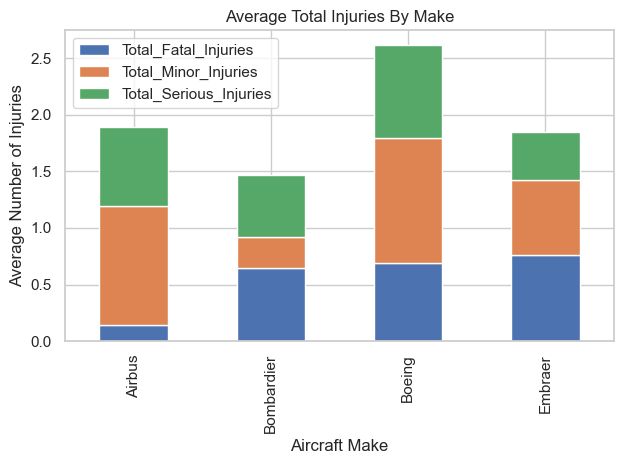

In [34]:
# TO DO: ADD VALUES OF EACH BAR SECTION

# Create stacked bar plot
ax = top_4_makes.groupby(['Make'])[['Total_Fatal_Injuries', 'Total_Minor_Injuries', 'Total_Serious_Injuries']]\
    .mean().sort_values(by='Total_Fatal_Injuries', ascending=True).head().plot(kind='bar', stacked=True)
ax.set_title('Average Total Injuries By Make')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Average Number of Injuries');
plt.tight_layout()
plt.savefig('inj_by_make.png')

Next, I analyzed the **fatality rates** by make. Boeing and Bombardier hold the *lowest* fatality rates out of the top for manufacturers, while Embraer has the *highest* fatality rate among the four.

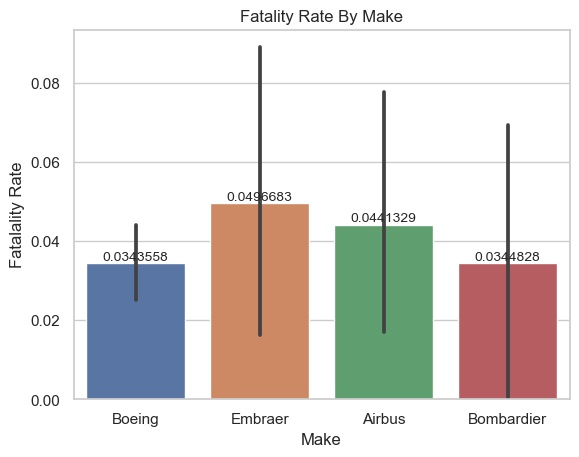

In [35]:
# Create bar plot
ax = sns.barplot(data=top_4_makes, x='Make', y='Fatal_Injuries_Rate')
ax.bar_label(ax.containers[0], fontsize=10);
ax.set(xlabel='Make', ylabel='Fatalality Rate', title='Fatality Rate By Make');

Lastly, I analyzed the **uninjured rate** by make. Bombardier came out on *top*, with a 93% uninjured rate. The remaining three manufacturers are quite comparable, ranging from 86% to 88%.

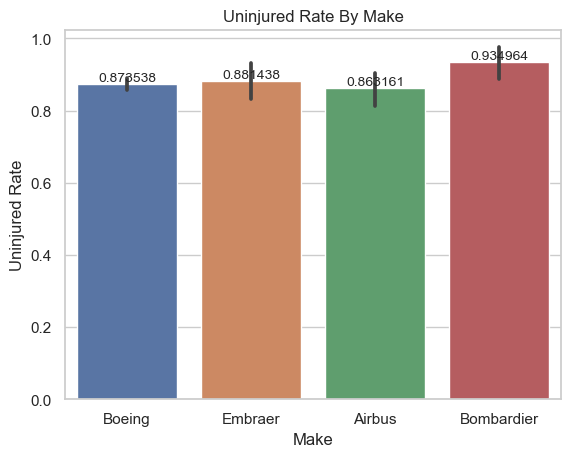

In [36]:
# Create bar plot
ax = sns.barplot(data=top_4_makes, x='Make', y='Uninjured_Rate')
ax.bar_label(ax.containers[0], fontsize=10);
ax.set(xlabel='Make', ylabel='Uninjured Rate', title='Uninjured Rate By Make');

<Axes: xlabel='Model'>

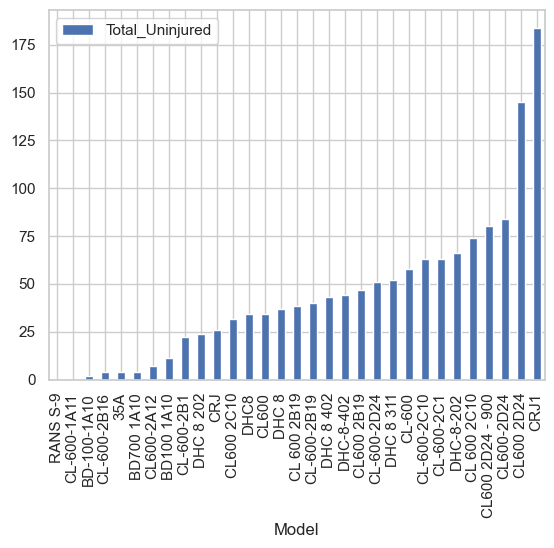

In [37]:
## DELETE
top_4_makes[top_4_makes['Make']=='Bombardier'].groupby(['Model'])[['Total_Uninjured']]\
    .mean().sort_values(by='Total_Uninjured', ascending=True).plot(kind='bar', stacked=True)

<Axes: xlabel='Model'>

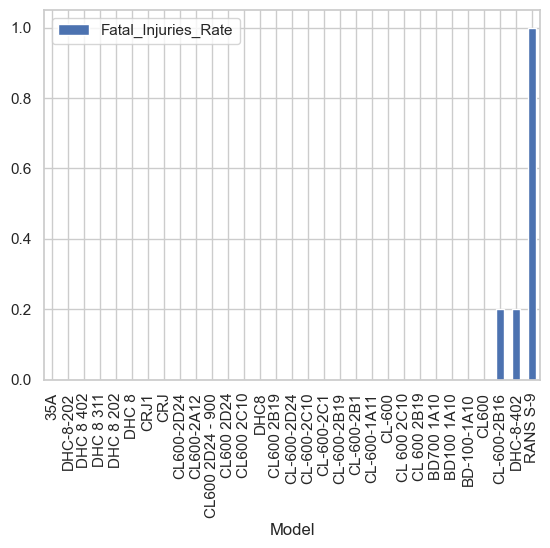

In [38]:
# DELETE
top_4_makes[top_4_makes['Make']=='Bombardier'].groupby(['Model'])[['Fatal_Injuries_Rate']]\
    .mean().sort_values(by='Fatal_Injuries_Rate', ascending=True).plot(kind='bar', stacked=True)

<Axes: xlabel='Model'>

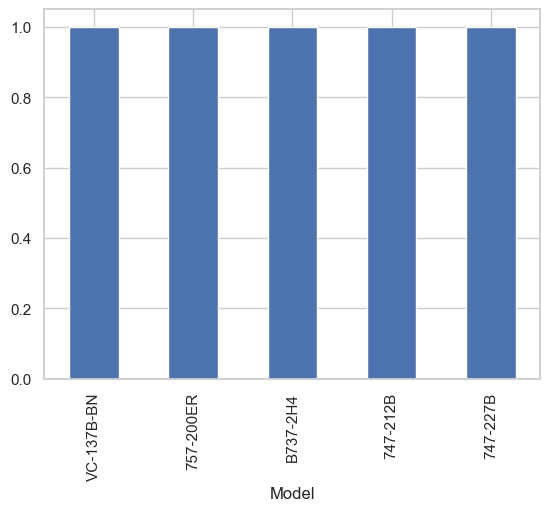

In [39]:
# DELETE
top_4_makes.groupby(['Model'])['Uninjured_Rate'].mean().sort_values(ascending=False).head().plot(kind='bar')

## Number of Engines Analysis

Aircrafts with **3 engines** hold both the *highest* uninjured rate and the *lowest* fatality rate, followed by aircrafts with 2 engines, aircrafts with 4 engines, and lastly, aircrafts with 1 engine. Aircrafts with 1 engines have the *lowest* uninjured rate and the *highest* fatality rate.

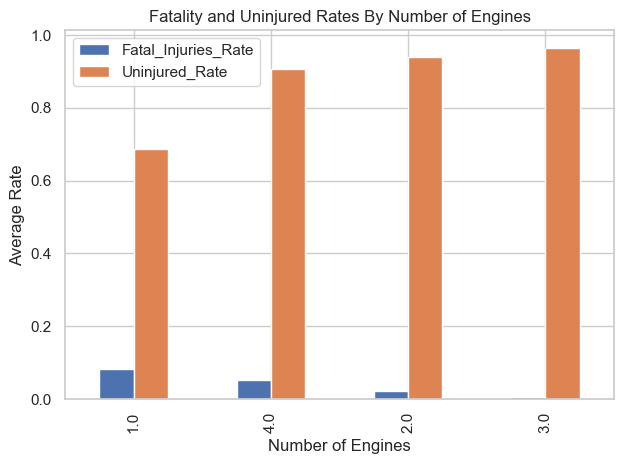

In [40]:
# Create bar plot
ax = top_4_makes.groupby(['Number_Of_Engines'])[['Fatal_Injuries_Rate', 'Uninjured_Rate']]\
    .mean().sort_values(by='Uninjured_Rate', ascending=True).plot(kind='bar', stacked=False);
ax.set(xlabel='Number of Engines', ylabel='Average Rate', title='Fatality and Uninjured Rates By Number of Engines');
plt.tight_layout()
plt.savefig('rates_by_eng.png')

In [41]:
# Bombardier aircrafts only come with 1 or 2 engines. According to the data, 2 engines are safer than one. I recommend we purchase 
# a Bombardier aircraft with 2 engines.
make_options = top_4_makes['Model'][(top_4_makes['Make']=='Bombardier') & (top_4_makes['Number_Of_Engines']==2)]
make_options

49380            CRJ
49601         CL-600
49619         CL-600
58138    CL-600-1A11
58754    CL-600-2B19
            ...     
86634    CL-600-2B16
86915    CL-600-2B19
87622    CL-600-2B16
87932     BD100 1A10
88247    BD-100-1A10
Name: Model, Length: 79, dtype: object

## Location Analysis

When numbers from the **top 4 manufacturers** are included, the **midwest** has the *lowest* average fatality rate, while the **west** has the *highest* fatality rate. When comparing these same numbers across **only Bombardier** aircrafts, the **south** has the *lowest* average fatality rate and the **northeast** has the *highest* fatality rate. 

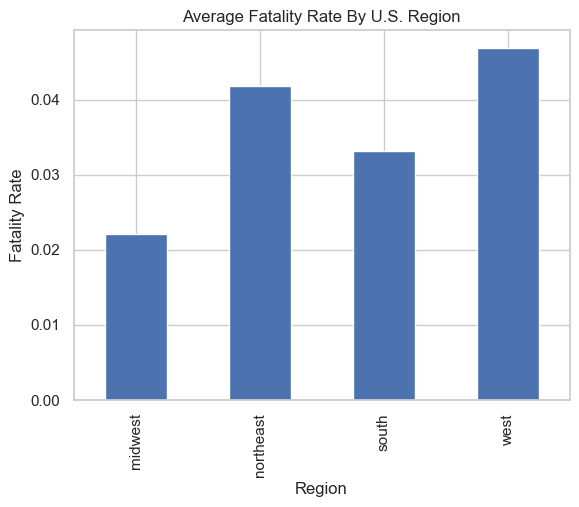

In [42]:
# Create bar chart
ax = top_4_makes.groupby('Region')['Fatal_Injuries_Rate'].mean().plot(x='Region', y='Fatal_Injuries_Rate', kind='bar')
ax.set(xlabel='Region', ylabel='Fatality Rate', title='Average Fatality Rate By U.S. Region');

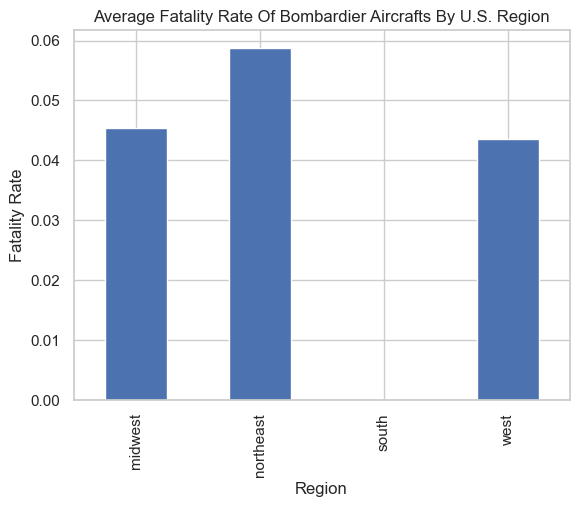

In [43]:
bombardier_df = top_4_makes[top_4_makes['Make']=='Bombardier']
ax = bombardier_df.groupby('Region')['Fatal_Injuries_Rate'].mean().plot(x='Region', y='Fatal_Injuries_Rate', kind='bar')
ax.set(xlabel='Region', ylabel='Fatality Rate', title='Average Fatality Rate Of Bombardier Aircrafts By U.S. Region');

I was skeptical upon discovering that the fatality rate among Bombardier planes in the south was 0%. I checked to see if there were any records of accidents among Bombardier aircrafts in the south, and in fact there were.

In [44]:
# Check how many accidents/incidents there are in the dataset with Bombardier aircrafts in the south
top_4_makes[(top_4_makes['Make']=='Bombardier') & (top_4_makes['Region']=='south')].shape

(25, 31)

In [45]:
# Check to see if there are any Bombardier flights in the south
top_4_makes[(top_4_makes['Make']=='Bombardier') & (top_4_makes['Region']=='south')].head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Airport_Code,Airport_Name,Injury_Severity,Aircraft_Damage,...,Weather_Condition,Broad_Phase_Of_Flight,Report_Status,Publication_Date,Total_Passengers,Fatal_Injuries_Rate,Uninjured_Rate,City,State,Region
49380,20001212X21909,Accident,ATL00LA092,2000-09-17,"ATLANTA, GA",United States,NaN,NaN,Non-Fatal,NaN,...,VMC,Cruise,Probable Cause,02-03-2001,51.0,0.0,0.980392,Atlanta,GA,south
49619,20001215X45424,Incident,NYC01IA024,2000-10-26,"FALMOUTH, KY",United States,NaN,NaN,Incident,NaN,...,VMC,Cruise,Probable Cause,18-05-2001,50.0,0.0,1.000000,Falmouth,KY,south
63798,20080124X00102,Incident,OPS08IA002A,2007-12-02,"Baltimore, MD",United States,BWI,BALTIMORE-WASHINGTON INTL,Incident,NaN,...,VMC,Takeoff,Probable Cause,31-03-2008,184.0,0.0,1.000000,Baltimore,MD,south
64005,20080305X00268,Accident,NYC08CA088,2008-01-30,"Charlotte, NC",United States,CLT,Charlotte/Douglas Internationa,Non-Fatal,Substantial,...,VMC,NaN,The tug driver's failure to stop for a taxiway...,25-09-2020,2.0,0.0,1.000000,Charlotte,NC,south
64815,20080720X01081,Accident,NYC08LA234,2008-06-28,"Charlotte, NC",United States,CLT,Charlotte-Douglas,Non-Fatal,Substantial,...,VMC,NaN,The tugdriver and wing walker's lack of commun...,25-09-2020,112.0,0.0,1.000000,Charlotte,NC,south


# Conclusions

## Limitations

There are various limitations in this analysis.

1. I could not compute the **proportion of accidents to total number of flights**, as this data includes only records of accidents or incidents. This data does not include clean records of flights with no accidents or incidents. When recommending an aircraft company, aircraft model, or location of operation, I used the basis of which has the lowest number of accidents/incidents, with zero accidents/incidents not being an option.

2. I could *not* narrow the data down to **one specific model** that would be the best purchase for our first aircraft. When comparing 2-engine Bombardier aircrafts, many had an uninjured rate of 100%. These would all be viable options, but many more variables go into purchasing the first aircraft. Safety can be further emphasized when including data of successful, accident-free flights (as mentioned above). Models can be further compared using cost, maintenance issues, and size based on how many passengers we wish to transport at one time.

3. I could *not* narrow the data down to **one specific city** for us to begin operating out of. There were not enough factors that would effect location to determine a safe choice. Additionally, with only 25 data points of Bombardier aircrafts in the south, I do not know if location is a factor of fatal injury rates. Are Bombardier flights safer in the south or are there less Bombardier flights in the south?

## Recommendations

This analysis has led me to conclude the following three recommendations: 
1. **Bombardier** is the aircraft manufacturer that I suggest we purchase. Bombardier has overall the least average number of injuries and the highest unijured rate when compared to Airbus, Boeing and Embraer.

2. I recommend we purchase a Bombardier aircraft with **2 engines**. Bombardier aircrafts only come with 1 or 2 engines. According to the data, 2-engine aircrafts have a *lower* fatality rate and a *higher* uninjured rate that 1-engine aircrafts.

3. To initialize our aviation operation, I recommend we begin in the **south** region of the **United States**, as to operate close to home and not have the added challenges of customs and international flights. I was not able to narrow down a city with the given data. Further analysis is required.

## Next Steps

In order to optimize ***profits*** for this new industry expansion, we must analyze the financial aspects by answering the following three questions: 

1. What **flight schedule** will provide the greatest profit? Consider seasonal, weekly, and daily schedules. 

2. **How many aircrafts** should we initially purchase? Consider *cost* of aircraft and operation of such aircraft.

3. What **city** should we operate out of? Let's plan to narrow this down further. Consider chances of interrupted flight due to *weather*.